# Set up and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
import re 
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from sklearn.preprocessing import LabelEncoder

# Import data

In [3]:
df = pd.read_csv("data/combined_asset_data.csv")
df.head()

,uid,asset_name,country,start_year,latitude,longitude,parent_name,owner_name,operator_name,sector,data_source
0,GEM_0,Kabertene wind farm,Algeria,2014.0,28.4624,-0.0576,NaN,Shariket Kahraba wa Taket Moutadjadida (SKTM),Shariket Kahraba wa Taket Moutadjadida (SKTM),wind power/onshore,GEM
1,GEM_2,Gulf Of Ziet Wind Complex,Egypt,2018.0,25.8577,34.4182,NaN,New and Renewable Energy Authority (NREA),New and Renewable Energy Authority (NREA),wind power/onshore,GEM
2,GEM_3,Gulf Of Ziet Wind Complex,Egypt,2018.0,25.8577,34.4182,NaN,New and Renewable Energy Authority (NREA),New and Renewable Energy Authority (NREA),wind power/onshore,GEM
3,GEM_4,Gulf Of Ziet Wind Complex,Egypt,2018.0,25.8577,34.4182,NaN,New and Renewable Energy Authority (NREA),New and Renewable Energy Authority (NREA),wind power/onshore,GEM
4,GEM_5,Ras Ghareb wind farm,Egypt,2019.0,28.4005,32.9572,NaN,Engie SA,Engie SA,wind power/onshore,GEM


# Deal with missings
We have many missing values for different features. There are a few restrictions we implement on our dataset: 
- remove assets with missing latitude and longitude
- remove assets with missing owner??
- remove assets with missing start year??

# Check missing

In [5]:
missings = pd.DataFrame([df.isnull().sum(), df.isnull().mean()]).transpose().rename(columns = {0: "count", 1: "share"})
missings

,count,share
uid,0.0,0.000000
asset_name,5222.0,0.088829
country,0.0,0.000000
start_year,26134.0,0.444554
latitude,0.0,0.000000
longitude,0.0,0.000000
parent_name,24798.0,0.421828
owner_name,0.0,0.000000
operator_name,37851.0,0.643867
sector,0.0,0.000000


# Deal with owner information

In [6]:
sample = df.sample(n = 30, random_state=62442)
sample

,uid,asset_name,country,start_year,latitude,longitude,parent_name,owner_name,operator_name,sector,data_source
58040,SFI_5777,NaN,Spain,NaN,43.554963,-5.717118,NaN,"EMPRESA MUNICIPAL DE AGUAS DE GIJÓN, S.A.",NaN,wastewater/yes,SFI
12766,GEM_16848,Elena PV solar farm,Chile,2023.0,-23.623100,-70.376000,NaN,Repsol,Repsol,solar power/pv,GEM
24333,GEM_33602,Benxi Steel & Iron power station,China,2017.0,41.275947,123.732610,Bengang Steel Plates Co Ltd,Bengang Steel Plates Co Ltd,NaN,coal plant/unknown,GEM
17612,GEM_21939,Xinjiang Korla Huaneng solar farm,China,2014.0,41.723900,86.173500,NaN,Huadian Fuxin Energy Development CO LTD,Bazhou Huaneng Solar Power Generation CO LTD,solar power/pv,GEM
48857,CLT_13391,Mantos Blancos Mine,CHL,NaN,-23.448735,-70.090115,Amerigo Resources,Amerigo Resources,NaN,copper mining,Climate Trace
38514,CLT_3048,AHM Coal Mac Mine #1,USA,NaN,37.561111,-82.970278,Appalachian Highwall Mining,Appalachian Highwall Mining,NaN,coal mining,Climate Trace
9846,GEM_12611,Inner Mongolia Chayouhou Banner Bayinxile wind...,China,2010.0,41.161000,112.743300,NaN,Shenzhen Nanguo Energy CO LTD,Shenzhen Nanguo Energy CO LTD,wind power/onshore,GEM
40983,CLT_5517,Queen Elizabeth generating station,CAN,NaN,52.094400,-106.705000,Saskatchewan Power Corp (SaskPower),Saskatchewan Power Corp (SaskPower),NaN,electricity generation,Climate Trace
735,GEM_750,Pontal wind farm,Brazil,2017.0,-30.255900,-50.766200,NaN,Enerplan Energia Eolica SA,Enerplan Energia Eolica SA,wind power/onshore,GEM
26490,GEM_35759,Tangshan Beijiao power station,China,2019.0,39.709727,118.217675,Datang International Power Generation Co Ltd,Hebei Datang International Tangshan Beijiao Th...,NaN,coal plant/unknown,GEM


In [7]:
len(df.owner_name.unique())

21465

In [10]:
# turn everything into uppercase
df['owner_name'] = df.owner_name.str.upper()
df.head()

,uid,asset_name,country,start_year,latitude,longitude,parent_name,owner_name,operator_name,sector,data_source,sector_main,sector_sub
0,GEM_0,Kabertene wind farm,Algeria,2014.0,28.4624,-0.0576,NaN,SHARIKET KAHRABA WA TAKET MOUTADJADIDA (SKTM),Shariket Kahraba wa Taket Moutadjadida (SKTM),wind power/onshore,GEM,wind power,onshore
1,GEM_2,Gulf Of Ziet Wind Complex,Egypt,2018.0,25.8577,34.4182,NaN,NEW AND RENEWABLE ENERGY AUTHORITY (NREA),New and Renewable Energy Authority (NREA),wind power/onshore,GEM,wind power,onshore
2,GEM_3,Gulf Of Ziet Wind Complex,Egypt,2018.0,25.8577,34.4182,NaN,NEW AND RENEWABLE ENERGY AUTHORITY (NREA),New and Renewable Energy Authority (NREA),wind power/onshore,GEM,wind power,onshore
3,GEM_4,Gulf Of Ziet Wind Complex,Egypt,2018.0,25.8577,34.4182,NaN,NEW AND RENEWABLE ENERGY AUTHORITY (NREA),New and Renewable Energy Authority (NREA),wind power/onshore,GEM,wind power,onshore
4,GEM_5,Ras Ghareb wind farm,Egypt,2019.0,28.4005,32.9572,NaN,ENGIE SA,Engie SA,wind power/onshore,GEM,wind power,onshore


(-0.45, 9.45, -0.05500000000000001, 0.05500000000000001)

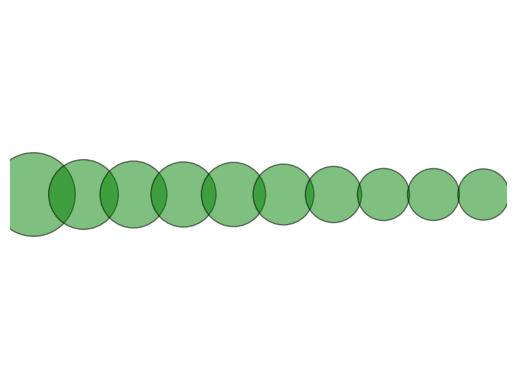

In [32]:
df_owner = df.groupby('owner_name').uid.count().sort_values(ascending=False).head(10).reset_index()
companies = list(df_owner.owner_name) 
assets = list(df_owner.uid)

for i, (company, asset) in enumerate(zip(companies, assets)):
    plt.scatter(i, 0, s=asset*10, alpha=0.5, label=f'{company}\nAssets: {asset}', facecolor='green', edgecolor='black')

# Adding text labels for each company and asset count
# plt.annotate('\n'.join(companies), xy=(range(len(companies)), [0]*len(companies)), ha='center', va='center', family='monospace')
# plt.annotate('\n'.join([str(a) for a in assets]), xy=(range(len(companies)), [0]*len(companies)), ha='center', va='center', family='monospace')

# Remove axes
plt.axis('off')

# # Show plot
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.title('Assets by Company', family='monospace')
# plt.tight_layout()
# plt.show()

# # df_owner[0]
# df_owner

# Encode sector

In [9]:
# split sector 
df[['sector_main', 'sector_sub']] = df.sector.str.split("/", expand = True, n = 1)
df.isnull().sum()

uid                  0
asset_name        5222
country              0
start_year       26134
latitude             0
longitude            0
parent_name      24798
owner_name           0
operator_name    37851
sector               0
data_source          0
sector_main          0
sector_sub       20343
dtype: int64

In [54]:
# enumerate the sector labels

label_encoder = LabelEncoder()

df['sector_main_num'] = label_encoder.fit_transform(df['sector_main'])
df['sector_num'] = label_encoder.fit_transform(df['sector'])
# type(df['sector_num'][0])

# Maps for presentation

## World map

/var/folders/38/htb96lxn74vght_msfty2d8w0000gn/T/ipykernel_83384/1838388280.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


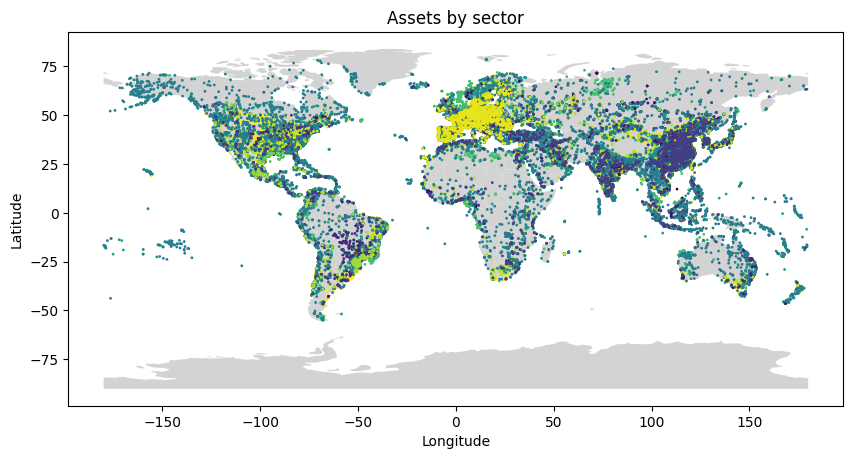

In [99]:
# World basemap for context
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame with the latitude and longitude data
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# Plot the world basemap
ax = world.plot(figsize=(10, 6), color='lightgray')

# Plot your data on top with different colors based on the 'sector_num' column
scatter = df_geo.plot(ax=ax, c=df_geo['sector_main_num'], marker='o', markersize=1, legend=True)

# prepare legend
legend_df = df_geo[['sector_main_num', 'sector_main']].drop_duplicates()

# Customize the plot
plt.title('Assets by sector') 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

## Map of Brazil


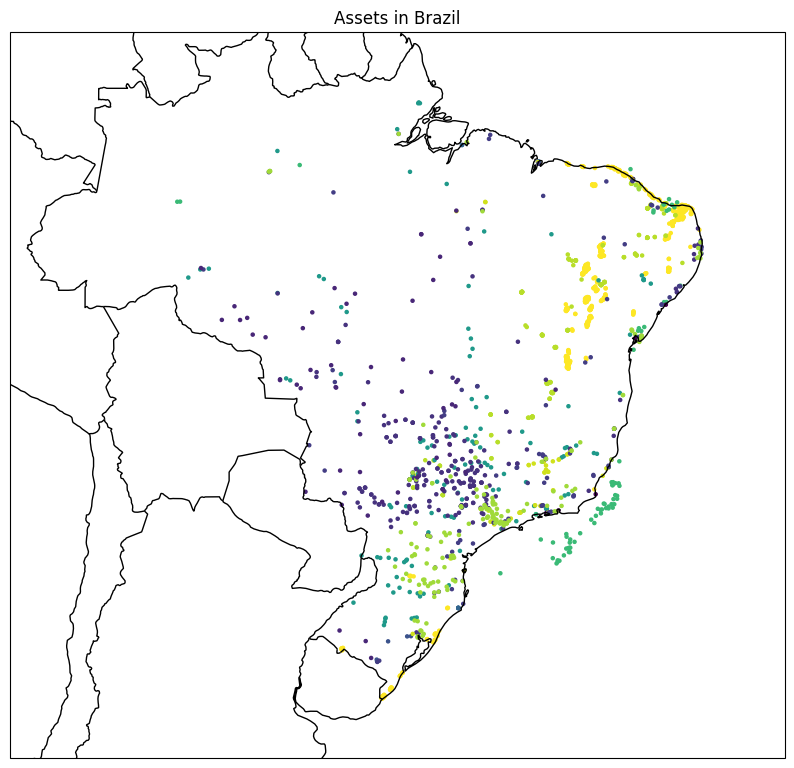

In [95]:
# Filter assets in Brazil
brazil_assets = df[df['country'] == 'Brazil']

# Create a map of Brazil
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75, -30, -35, 5])  # Define the extent of the map (lon_min, lon_max, lat_min, lat_max)

# Plot assets
ax.scatter(brazil_assets['longitude'], brazil_assets['latitude'], c=brazil_assets['sector_main_num'], 
           marker='o', 
           s=5, 
           transform=ccrs.PlateCarree())

# Add map features
ax.coastlines()

# Add country borders
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1)


# Add title and labels
plt.title('Assets in Brazil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:

top_owners = df_owner.groupby('main_owner').asset_name.count().reset_index().sort_values('asset_name', ascending = False).head(20).sort_values('asset_name')

plt.barh(top_owners.main_owner, top_owners.asset_name)
plt.xticks(rotation=90)
plt.title('Top 20 (main) owners by number of assets')
plt.show()

df_owner.groupby('main_owner').asset_name.count().describe()

In [ ]:

top_sectors = df.groupby('sector').asset_name.count().reset_index().sort_values('asset_name')
top_sectors

plt.barh(top_sectors.sector, top_sectors.asset_name)
plt.xticks(rotation=90)
plt.title('Sectors by number of assets')
plt.show()

df.sector.nunique()

In [1]:
top_countries = df.groupby(['country']).asset_name.count().reset_index().sort_values('asset_name').tail(20)
top_countries

plt.barh(top_countries.country, top_countries.asset_name)
plt.xticks(rotation=90)
plt.title('Top 20 countries by number of assets')
plt.show()

NameError: name 'df' is not defined

# Progress summary: 

GEM data: 
- downloaded asset data from GEM (Global Energy Monitor) about 12 types of energy-related assets
- cleaned each separate dataset (due to idiosyncracies between then sets, had to do each one separately)
- for each dataset: kept asset name, sector, owner(s), geographic location, start date, and if available included capacity 

EDA: 
- we focus only on assets where location, owner and start date are known
- in this dataset, we have about 45k assets, attributed to more than 12k owners
- majority of owners (more than 75%) own only 1-2 companies
- assets are located acround the globe, with most of them present in China, US, India, Brazil, Spain and Germany
- the sector wind power has the highest number of associated assets (~10k), followed by solar (~7k), and coal power plant (~6k)

The next steps are: 
- clean in a similar fashion the mining data from the Climate Trace source
- overlay asset information with the deforestation data using latitutde/longitude info
- consider how to feature engineer informaiton about onwers in any ML exercise on predicting deforestation

In [12]:
trial = {'key1': [14, 44], 'key2': [12, 84]}

print(trial['key1'][0])

14
